In [8]:
import pandas as pd
import numpy as np
import prophet
import matplotlib.pyplot as plt

In [2]:
dir(prophet)

['Path',
 'Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'diagnostics',
 'f',
 'forecaster',
 'here',
 'make_holidays',
 'models',
 'plot']

In [3]:
df = pd.read_csv('data/flights_data.csv')

<Axes: >

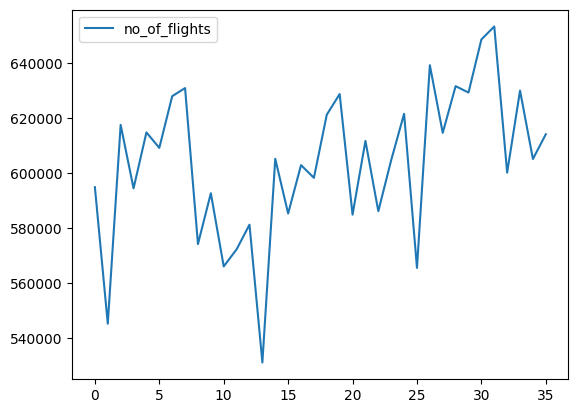

In [4]:
df.plot()

In [6]:
# Train-test split (e.g., last 20% for test)
split_idx = int(len(df) * 0.8)
train = df.iloc[:split_idx]
test = df.iloc[split_idx:]

In [15]:
train
train = train.rename(columns={'Dates': 'ds', 'no_of_flights': 'y'})

In [ ]:
model = prophet.Prophet()
model.add_country_holidays(country_name='US')
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.add_seasonality(name='weekly', period=7, fourier_order=3)
model.fit(train)

15:14:35 - cmdstanpy - INFO - Chain [1] start processing
15:14:39 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
future = model.make_future_dataframe(periods=len(test), freq='D')  # adjust freq if needed
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
31,2007-04-05,3.357008e+06,3.357008e+06,3.357008e+06
32,2007-04-06,3.438638e+06,3.438638e+06,3.438638e+06
33,2007-04-07,1.870260e+06,1.870260e+06,1.870260e+06
34,2007-04-08,-2.112595e+06,-2.112595e+06,-2.112595e+06
35,2007-04-09,-6.562691e+06,-6.562691e+06,-6.562691e+06


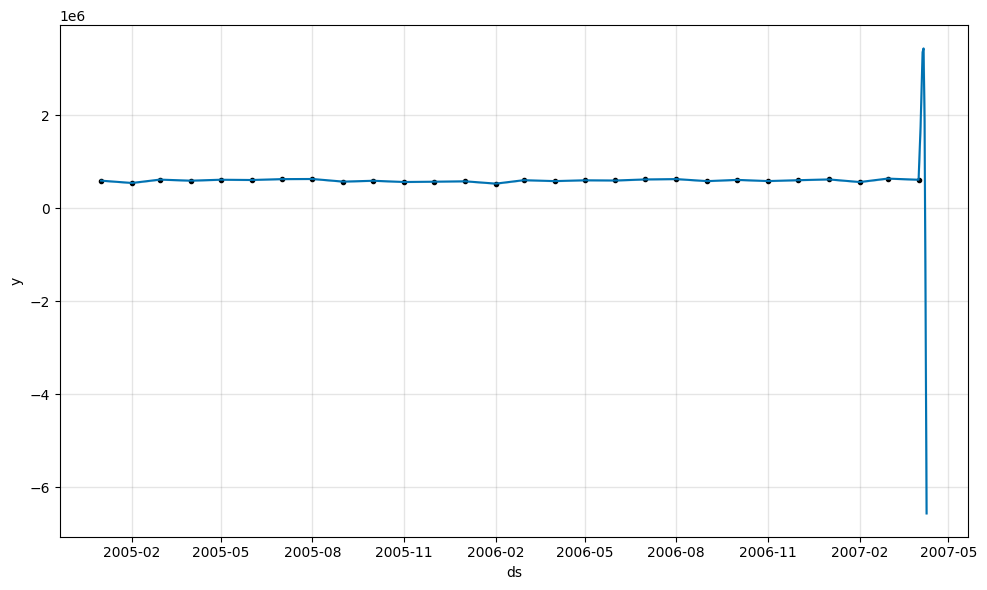

In [18]:
fig = model.plot(forecast)
plt.show()